# **Implementing Red/Black Trees (RBTs)**
#### Carl Ehrett, Stephen Peele

### **1. Why care about red/black trees?**

#### Binary search trees
A red/black tree (RBT) is a type of binary search tree (BST). Recall that a BST has the following properties:
- Each node may have up to two children. 
- All left descendants of a node are less than that node. 
- All right descendants of a node are greater than that node.
- Insert, delete, and lookup are all $\mathcal O (h)$ where $h$ is the height of the tree.
- In average cases, $h$ is proportional to $\log n$, making the above operations $\mathcal O (\log n)$.

#### Motivation to use red/black trees

- Though the complexity of insert, delete and lookup for a BST are $\mathcal O(\log n)$ in the average case, they are $\mathcal{O}(n)$ in the worst case. 
- It may be the case that a BST is highly unbalanced either inherently or through a sequence of operations.
- If the depth of the tree is becomes too great, then operations may become very inefficient.
- Is there a way to maintain the "balance" in a BST and improve the worst case complexity? *Yes!*
- This leads to the red/black tree.

#### What is a red/black tree?

A red/black tree is a BST with the following additional properties:
- Every node has a color -- red or black.
- Every red node that is not a leaf has only black children.
- Every path from the root to a leaf contains the same number of black nodes. 
- The root node is black.

After any operation on a RBT, these properties have to be restored (if necessary). These constraints force the BST to maintain "balance" -- the depth is on average roughly $2\log n$ (Sedgewick, 2008). For example, a RBT with 500 random elements is, on average, about twelve (12) nodes deep! 

*Visualization*: https://www.cs.usfca.edu/~galles/visualization/RedBlack.html

#### What is gained?

- Very clearly, a balanced tree lends itself to more efficient operations. 
- The RBT constraints force the BST to maintain some sense of balance (not to imply perfect symmetry)!
- All operations on a RBT are worst-case $\mathcal{O}(\log n)$, certainly a marked improvement from $\mathcal{O}(n)$.

#### Real Instances of RBTs
- One use: the ext3 file system uses RBTs to keep track of directory entries in the Linux kernel.

#### Main results
- Implemented RBTs in Python.
- Visually, the balance in a RBT versus a BST for identical data is distinctly clear. 
- Timing tests demonstrate that the RBTs are indeed more efficient than BSTs in the worst-case.
- For average case, the RBT may actually be slower than the BST since the RBT has more computational overhead (as tested on SageMathCloud).

### **2. Background: Tree nodes, binary search trees, and plot_tree**
In this section, we establish code for tree nodes, binary search trees, and plot_tree (a function for plotting trees).

In [1]:
import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
class TreeNode(object):
    def __init__(self, data, left_child = None, right_child = None):
        self.data  = data
        self.left  = left_child
        self.right = right_child
        self.color = 1 # 1 for red, 0 for black 
    
    def traverse_infix(self, result = None):
        if result == None:
            result = []
            
        if self.left:
            self.left.traverse_infix(result)
            
        result.append(self.data)
        
        if self.right:
            self.right.traverse_infix(result)
            
        return result

In [3]:
# create a graphical representation of a binary tree (plot_tree, below, uses plot_node)
def plot_node(node, rb = True, level = 1, posx = 0, posy = 0):
    
    width = 2000.0 * (0.5**(level)) # This will be used to space nodes horizontally
    if node.color == 0 or rb == False: plt.text(posx, posy, str(node.data), horizontalalignment='center',color='k',fontsize=10)
    else: plt.text(posx, posy, str(node.data), horizontalalignment='center',color='r',fontsize=10)
    
    if node.left:
        px = [posx, posx-width]
        py = [posy-1, posy-15]
        if node.left.color == 0 or rb==False: plt.plot(px,py,'k-')
        else: plt.plot(px,py,'r-')
        plot_node(node.left, rb, level+1, posx-width, posy-20)
    
    if node.right:
        plot_node(node.right, rb, level+1, posx+width, posy-20)
        px = [posx, posx+width]
        py = [posy-1, posy-15]
        if node.right.color == 0 or rb==False:  plt.plot(px,py,'k-')
        else: plt.plot(px,py,'r-')

def plot_tree(node, figsize=(10,6)):
    if node.color == 1: rb=False
    else: rb=True
    rcParams['figure.figsize'] = figsize
    fig, ax = plt.subplots()
    ax.axis('off')
    plot_node(node,rb)
    plt.show()
    
##### Create also a normal, black-only version for testing
# create a graphical representation of a binary tree (plot_tree uses plot_node)
def plot_nodeBW(node, level = 1, posx = 0, posy = 0):
    
    width = 2000.0 * (0.5**(level))
    if node != None: 
        plt.text(posx, posy, str(node.data), horizontalalignment='center',color='k',fontsize=10)
        if node.left:
            px = [posx, posx-width]
            py = [posy-1, posy-18]
            plt.plot(px,py,'k-')
            plot_node(node.left, level+1, posx-width, posy-20)
    
        if node.right:
            plot_node(node.right, level+1, posx+width, posy-20)
            px = [posx, posx+width]
            py = [posy-1, posy-18]
            plt.plot(px,py,'k-')
    else: plt.text(posx, posy, 'NONE', horizontalalignment='center',color='k',fontsize=10)
    
    
        
def plot_treeBW(node, figsize=(10,6)):
    rcParams['figure.figsize'] = figsize
    fig, ax = plt.subplots()
    ax.axis('off')
    plot_nodeBW(node)
    plt.show()


In [4]:
## Below is code to implement a (colorless) binary search tree.
class BST(object):
    def __init__(self):
        self.tree = None
    
    def _find_node(self, node, obj):
        if node == None:
            return None
        if node.data == obj:
            return node
        if obj < node.data:
            return self._find_node(node.left, obj)
        else: # so obj > node.data
            return self._find_node(node.right, obj)
    
    def is_element(self, obj):
        node = self._find_node(self.tree, obj)
        if node:
            return True
        else:
            return False

    def _insert(self, node, obj):
        if obj < node.data:
            if node.left:
                self._insert(node.left, obj)
            else:
                node.left = TreeNode(obj)
        elif obj > node.data:
            if node.right:
                self._insert(node.right, obj)
            else:
                node.right = TreeNode(obj)
        # do nothing if equal
    
    def insert(self, obj):
        if self.tree == None:
            self.tree = TreeNode(obj)
        else:
            self._insert(self.tree, obj)
        
    def _replace_child(self, node, old, new):
        if node==None:
            self.tree = new
        elif node.left == old:
            node.left = new
        elif node.right == old:
            node.right = new
        else:
            assert(false)
    
    def _delete_node(self, parent, node, obj):
        if node == None:
            return
        if obj < node.data:
            # traverse left
            self._delete_node(node,node.left, obj)
        elif obj > node.data:
            # traverse right
            self._delete_node(node,node.right, obj)
        elif node.data == obj:
            if node.left == None:
                # no left child, so replace node by its right child
                self._replace_child(parent, node, node.right)
            elif node.right == None:
                # no right child, so replace node by its left child
                self._replace_child(parent, node, node.left)
            else: # node has two children:
                parent = node
                pred   = node.left
                while pred.right: 
                    parent = pred
                    pred   = pred.right
                node.data=pred.data
                self._replace_child(parent, pred, pred.left)
                
                # find predecessor pred, replace node.data with it:
                # ...
                
                # now replace the predecessor by its left child:
                # ...
    
    def delete(self, obj):
        if self.tree == None:
            return
        self._delete_node(None, self.tree, obj)        


### **3. Left-leaning Red/Black Trees**
In this section, we implement a class for left-leaning red/black trees, a la Sedgewick 2008.

In [5]:
### Here is the LLRBT implementation.
class RBT(object):
    def __init__(self):
        """Initialize a red/black tree."""
        self.tree = None
    
    def _find_node(self, node, obj):
        """Private function for traversing tree to lookup obj."""
        if node == None:
            return None
        if node.data == obj:
            return node
        if obj < node.data:
            return self._find_node(node.left, obj)
        else: # so obj > node.data
            return self._find_node(node.right, obj)
    
    def is_element(self, obj):
        """Public function to lookup obj. Returns True iff obj is in tree."""
        node = self._find_node(self.tree, obj)
        if node:
            return True
        else:
            return False

    def _insert(self, node, obj, ):
        """Private function for traversing tree to insert obj. Perform color changes on the way down, and rotations on the way up, to preserve RBT properties."""
        if node == None: return TreeNode(obj) # If we've arrived at a terminus, then make new node.
        if self._isRed(node.left) and self._isRed(node.right): self._colorFlip(node) # If both children are red, then colorflip
        if obj < node.data: node.left = self._insert(node.left,obj)
        elif obj > node.data: node.right = self._insert(node.right,obj)
        if self._isRed(node.right) and not self._isRed(node.left): node = self._rotateLeft(node)
        if self._isRed(node.left) and self._isRed(node.left.left): node = self._rotateRight(node)
        return node
    
    def insert(self, obj):
        """Public function to insert obj in tree."""
        if self.tree == None:
            self.tree = TreeNode(obj)
        else:
            self.tree = self._insert(self.tree, obj)
            self.tree.color = 0 # The root must always be black
            
    def _colorFlip(self,node): # flip the colors of node and its children
        """Flip the color of node and its children. Used internally to preserve RBT properties."""
        node.color       = 1 - node.color
        if node.left: node.left.color  = 1 - node.left.color
        if node.right: node.right.color = 1 - node.right.color
    
    def _rotateRight(self,node): # rotate right
        """Rotate node right, preserving RBT properties."""
        originalLeft = node.left
        node.left = originalLeft.right
        originalLeft.right = node
        originalLeft.color = node.color
        node.color = 1
        return originalLeft
        
    def _rotateLeft(self,node): # rotate left
        """Rotate node left, preserving RBT properties."""
        originalRight = node.right
        node.right = originalRight.left
        originalRight.left = node
        originalRight.color = node.color
        node.color = 1
        return originalRight
    
    def _isRed(self,node): 
        """Returns True iff node is red."""
        if node == None: return 0 # Nil nodes are black
        return(node.color==1)
        
    def _delete_node(self, node, obj):
        """Private function for traversing tree to delete obj. Perform movements and rotations during traversal to preserve RBT properties."""
        if node == None: return node 
        if obj < node.data:
            if node.left == None or (not self._isRed(node.left) and not self._isRed(node.left.left)):
                node = self._moveRedLeft(node)
            node.left = self._delete_node(node.left, obj)
        else:
            if self._isRed(node.left): node = self._rotateRight(node) 
            if obj == node.data and node.right == None: 
                return None
            if node.right == None or (not self._isRed(node.right) and not self._isRed(node.right.left)): 
                node = self._moveRedRight(node)
            if obj == node.data:
                node.data = self._min(node.right)
                node.right = self._deleteMin(node.right)
            else: node.right = self._delete_node(node.right, obj)
        return self.fixUp(node)
    
    def _deleteMin(self,node):
        """Delete the minimum descendant of node. Performs movements during traversal to preserve RBT properties."""
        if node.left == None: return None
        if node.left == None or (not self._isRed(node.left) and not self._isRed(node.left.left)):
            node = self._moveRedLeft(node)
        node.left = self._deleteMin(node.left)
        return self.fixUp(node)
    
    def _min(self,node): 
        """Return the data of the minimum descendant of node."""
        while node.left != None: node = node.left 
        if node == None: return None 
        else: return node.data 
        
    def _moveRedLeft(self, node):
        """Moves red node left. Used internally to preserve RBT properties."""
        self._colorFlip(node)
        if node.right and self._isRed(node.right.left):
            node.right = self._rotateRight(node.right)
            node = self._rotateLeft(node)
            self._colorFlip(node)
        return node
    
    def _moveRedRight(self, node):
        """Moves red node right. Used internally to preserve RBT properties."""
        self._colorFlip(node)
        if node.left and self._isRed(node.left.left):
            node = self._rotateRight(node)
            self._colorFlip(node)
        return node
    
    def delete(self, obj):
        """Public function for deleting node containing obj."""
        if self.tree == None:
            return
        else:
            self.tree = self._delete_node(self.tree, obj)
    
    def fixUp(self, node):
        """Rotates and colorflips where necessary. Used internally to preserve RBT properties."""
        if self._isRed(node.right): 
            node = self._rotateLeft(node)
        if self._isRed(node.left) and self._isRed(node.left.left): 
            node = self._rotateRight(node)
        if self._isRed(node.left) and self._isRed(node.right): 
            self._colorFlip(node)
        return node
        


### **4. Demonstrating red/black trees**
In this section, we demonstrate the use of the red/black trees implemented above, providing some visual comparisons with ordinary binary search trees. An example of worst-case insert for an ordinary binary search tree is considered.

['Alice', 'Bob', 'Carol', 'Doug', 'Eve', 'Frank', 'Ginger', 'Howard', 'Irene', 'Jeff', 'Kathy', 'Luis', 'Mabel', 'Norm', 'Oprah', 'Peter', 'Queen', 'Ronald', 'Sarah', 'Tom', 'Ursala', 'Vince', 'Wanda', 'Yaakov', 'Zandra']
['Alice', 'Bob', 'Carol', 'Doug', 'Eve', 'Frank', 'Ginger', 'Howard', 'Irene', 'Jeff', 'Kathy', 'Luis', 'Mabel', 'Norm', 'Oprah', 'Peter', 'Queen', 'Ronald', 'Sarah', 'Tom', 'Ursala', 'Vince', 'Wanda', 'Yaakov', 'Zandra']


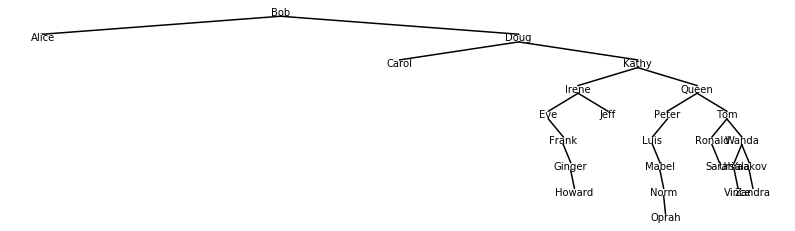

In [6]:
# Testing out insert on the family tree from homework 9
people1 = ['Bob','Alice','Doug','Kathy','Queen','Carol','Irene','Tom',
           'Peter','Wanda','Yaakov', 'Luis','Zandra','Ronald','Mabel','Ursala','Eve',
           'Frank','Ginger','Norm','Sarah','Jeff','Vince','Howard',
           'Oprah']

rbt = RBT()
bst = BST()
for p in people1:
    bst.insert(p)
    rbt.insert(p)

print(rbt.tree.traverse_infix())
print(bst.tree.traverse_infix())

plot_tree(bst.tree, figsize=(14,4))
plot_tree(rbt.tree, figsize=(14,4))

In [7]:
# Testing out delete on the family tree from homework 9
people1 = ['Bob','Alice','Doug','Kathy','Queen','Carol','Irene','Tom',
           'Peter','Wanda','Yaakov', 'Luis','Zandra','Ronald','Mabel','Ursala','Eve',
           'Frank','Ginger','Norm','Sarah','Jeff','Vince','Howard',
           'Oprah']

rbt = RBT()
for p in people1:
    rbt.insert(p)

plot_tree(rbt.tree, figsize=(10,2))
rbt.delete('Mabel')
plot_tree(rbt.tree, figsize=(10,2))

#### Sorted data in a BST vs. RBT
*Note the BST has a depth of nine vs. the RBT which has a depth of 3*

In [8]:
# Compare worst case insert in BST to how it is handled in RBT
rbt2 = RBT()
bst2 = BST()
for i in range(10):
    rbt2.insert(i)
    bst2.insert(i)
plot_tree(bst2.tree, figsize=(10,5))
plot_tree(rbt2.tree, figsize=(10,5))